# Market Retail Analysis

1. Data acquired from https://www.kaggle.com/datasets/koelin/retail-purchase-history?resource=download
0. 

## Import libraries

In [38]:
import shutil
import sys
from collections.abc import Callable
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [39]:
# --- AUTO-SYNC FROM GITHUB ---
# DO NOT EDIT

COLAB_ACTIVE = 'google.colab' in sys.modules

if COLAB_ACTIVE:
    REPO_URL = 'https://github.com/Ri-Dearg/ca2-market-retail.git'
    REPO_DIR = '/content/repo'

    if not Path(REPO_DIR).exists():
        !git clone $REPO_URL $REPO_DIR
    elif not Path(Path(REPO_DIR) / '.git').exists():
        shutil.rmtree(REPO_DIR)
        !git clone $REPO_URL $REPO_DIR
    else:
        %cd $REPO_DIR
        !git pull origin main

    %cd /content/repo
else:
    print('Running locally, not in Colab')


Running locally, not in Colab


## Utilities

In [40]:
# Callable function to create plots
def multi_row_plot(
    seaborn_func: Callable,
    data: pd.DataFrame,
    grid: tuple = (4, 4),
    size: tuple = (25, 20),
    *,
    y_col: bool = False,
    y_val: str = '',
    **kwargs: dict[str, Any],
) -> None:
    """Create a plot with default values.

    Args:
        seaborn_func (Callable): seaborn plot function to run.
        data (object): _description_
        grid (tuple, optional): Rows and columns. Defaults to (2, 7).
        size (tuple, optional): Width and Height. Defaults to (32, 7).
        y_col(None, optional): x axis if doing a correlation plot.
        y_val(str, optional): Value to plot on y axis.
        **kwargs(dict, optional): keyword for the seaborn function

    """
    data_cols = data.columns

    # Structure plots to easily fit the data.
    fig_plot, axes = plt.subplots(grid[0], grid[1], figsize=(size[0], size[1]))
    # Flatten axes so it is easier to enumerate.
    axes = axes.flatten()
    # Cheks to see if it is a correlation plot.
    if y_col is True:
        for i, item in enumerate(data_cols[1:]):
            seaborn_func(data=data, x=item, y=y_val, ax=axes[i], **kwargs)
    # Runs single predictor plot if not.
    else:
        for i, item in enumerate(data_cols):
            seaborn_func(data=data, x=item, ax=axes[i], **kwargs)

    # Hide any unused subplots.
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')


## Dataset General Exploration

In [41]:
# Load in excel file as data, combine two sheets into one frame
retail_data = pd.read_excel('online_retail.xlsx', sheet_name=None)
combined_retail = pd.concat(retail_data.values(), ignore_index=True)
combined_retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [42]:
combined_retail.info()
combined_retail.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [43]:
# Extract just Irish data as data frame
eire_data = combined_retail[combined_retail['Country'] == 'EIRE'].copy()
eire_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440,489520,35751C,PURPLE CURRENT CANDLE RING,12,2009-12-01 11:41:00,0.75,14911.0,EIRE
441,489520,72739B,WHITE CHOCOLATE SCENT CANDLE,12,2009-12-01 11:41:00,1.25,14911.0,EIRE
442,489520,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,2009-12-01 11:41:00,3.95,14911.0,EIRE
443,489520,22212,FOUR HOOK WHITE LOVEBIRDS,6,2009-12-01 11:41:00,2.10,14911.0,EIRE
444,489520,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2009-12-01 11:41:00,6.75,14911.0,EIRE
...,...,...,...,...,...,...,...,...
1064612,581433,22192,BLUE DINER WALL CLOCK,2,2011-12-08 15:54:00,8.50,14911.0,EIRE
1064613,581433,48187,DOORMAT NEW ENGLAND,2,2011-12-08 15:54:00,8.25,14911.0,EIRE
1064614,581433,48184,DOORMAT ENGLISH ROSE,2,2011-12-08 15:54:00,8.25,14911.0,EIRE
1064615,581433,20685,DOORMAT RED RETROSPOT,2,2011-12-08 15:54:00,8.25,14911.0,EIRE


In [44]:
# Create a Total Cost Column for price paid by product/invoice
eire_data['Total Cost'] = eire_data['Quantity'] * eire_data['Price']

In [45]:
# Describe data.
# Note that not all columns have an associated customer ID
eire_data.info()
# Quantity goes into negative, probably represents returns or cancellations
eire_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 17866 entries, 440 to 1064616
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      17866 non-null  object        
 1   StockCode    17866 non-null  object        
 2   Description  17866 non-null  object        
 3   Quantity     17866 non-null  int64         
 4   InvoiceDate  17866 non-null  datetime64[ns]
 5   Price        17866 non-null  float64       
 6   Customer ID  16195 non-null  float64       
 7   Country      17866 non-null  object        
 8   Total Cost   17866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.4+ MB


,Quantity,InvoiceDate,Price,Customer ID,Total Cost
count,17866.000000,17866,17866.000000,16195.000000,17866.000000
mean,18.545897,2010-12-23 21:21:35.823351552,7.013626,14693.529793,34.452007
min,-400.000000,2009-12-01 11:41:00,0.000000,12745.000000,-2736.160000
25%,4.000000,2010-06-29 09:32:00,1.250000,14156.000000,13.500000
50%,10.000000,2010-11-15 13:55:00,2.100000,14911.000000,17.400000
75%,12.000000,2011-07-28 14:27:00,4.950000,14911.000000,29.900000
max,1440.000000,2011-12-08 15:54:00,2736.160000,16047.000000,2736.160000
std,47.224288,NaN,64.900981,347.429356,106.460374


In [46]:
eire_data.to_csv('eire_retail.csv')

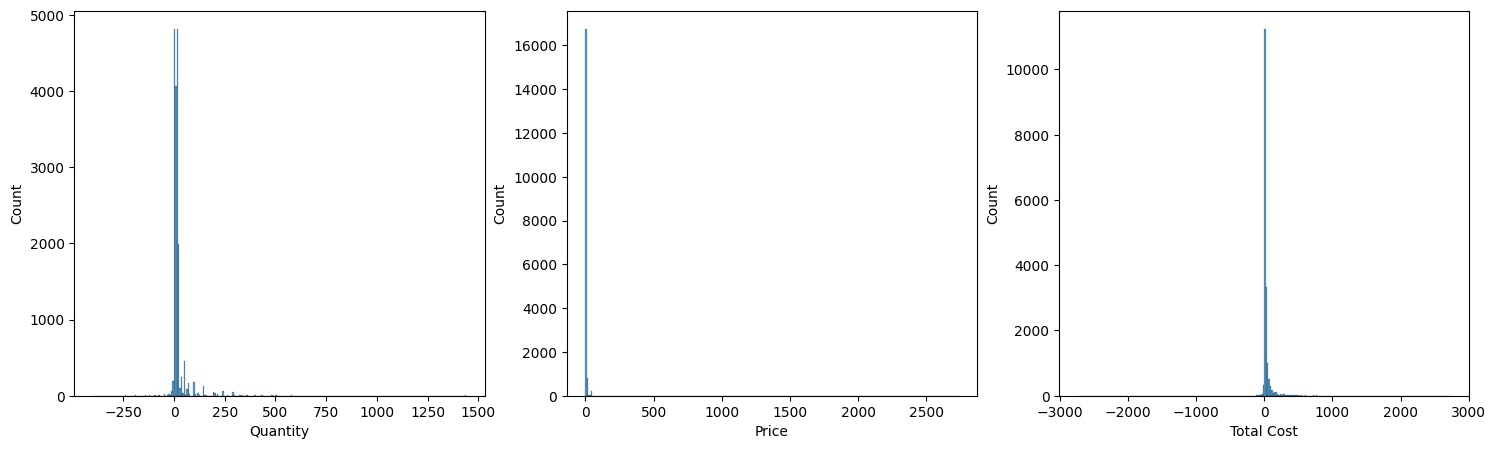

In [47]:
# The outliers make the majority of data hard to visualise
multi_row_plot(
    sns.histplot,
    eire_data[['Quantity', 'Price', 'Total Cost']],
    grid=(1, 3),
    size=(18, 5),
)

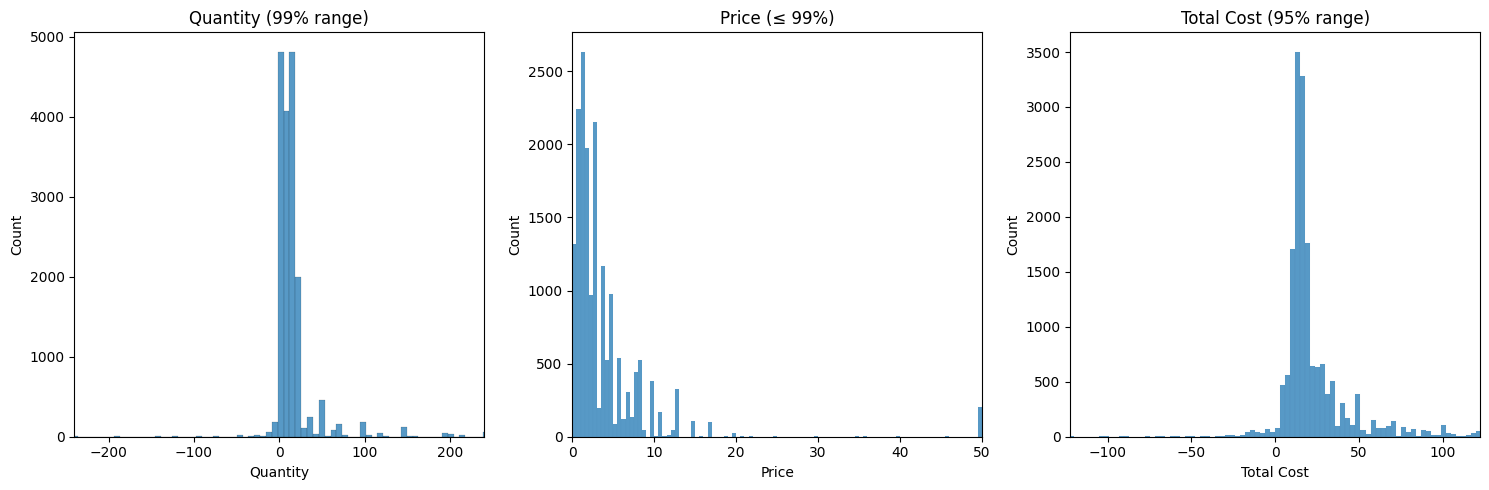

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# --- Quantity (99% range) ---
sns.histplot(eire_data['Quantity'], ax=axes[0])
q99 = eire_data['Quantity'].abs().quantile(0.99)
axes[0].set_xlim(-q99, q99)
axes[0].set_title('Quantity (99% range)')

# --- Price (≤ 99%) ---
sns.histplot(eire_data['Price'], binwidth=0.5, ax=axes[1])
axes[1].set_xlim(0, eire_data['Price'].quantile(0.99))
axes[1].set_title('Price (≤ 99%)')

# --- Total Cost (95% range) ---
sns.histplot(eire_data['Total Cost'], binwidth=3, ax=axes[2])
tc95 = eire_data['Total Cost'].abs().quantile(0.95)
axes[2].set_xlim(-tc95, tc95)
axes[2].set_title('Total Cost (95% range)')

plt.tight_layout()
plt.show()


# Clean Data

Remove returns / cancelled orders / manual entries / non-products / duplicates

In [ ]:
# Remove product codes that don't represent products
non_product_codes = ['M', 'C2', 'ADJUST', 'POST', 'D', 'BANK CHARGES']

clean_data_v1 = eire_data[
    ~eire_data['StockCode'].isin(non_product_codes)
].copy()
clean_data_v1


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Cost
440,489520,35751C,PURPLE CURRENT CANDLE RING,12,2009-12-01 11:41:00,0.75,14911.0,EIRE,9.0
441,489520,72739B,WHITE CHOCOLATE SCENT CANDLE,12,2009-12-01 11:41:00,1.25,14911.0,EIRE,15.0
442,489520,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,2009-12-01 11:41:00,3.95,14911.0,EIRE,31.6
443,489520,22212,FOUR HOOK WHITE LOVEBIRDS,6,2009-12-01 11:41:00,2.10,14911.0,EIRE,12.6
444,489520,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2009-12-01 11:41:00,6.75,14911.0,EIRE,13.5
...,...,...,...,...,...,...,...,...,...
1064612,581433,22192,BLUE DINER WALL CLOCK,2,2011-12-08 15:54:00,8.50,14911.0,EIRE,17.0
1064613,581433,48187,DOORMAT NEW ENGLAND,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5
1064614,581433,48184,DOORMAT ENGLISH ROSE,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5
1064615,581433,20685,DOORMAT RED RETROSPOT,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5


In [50]:
clean_data_v1.info()
clean_data_v1.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 17583 entries, 440 to 1064616
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      17583 non-null  object        
 1   StockCode    17583 non-null  object        
 2   Description  17583 non-null  object        
 3   Quantity     17583 non-null  int64         
 4   InvoiceDate  17583 non-null  datetime64[ns]
 5   Price        17583 non-null  float64       
 6   Customer ID  15946 non-null  float64       
 7   Country      17583 non-null  object        
 8   Total Cost   17583 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.3+ MB


,Quantity,InvoiceDate,Price,Customer ID,Total Cost
count,17583.000000,17583,17583.000000,15946.000000,17583.000000
mean,18.832736,2010-12-24 07:17:29.868622848,3.485544,14692.772858,34.609133
min,-400.000000,2009-12-01 11:41:00,0.000000,14016.000000,-1224.000000
25%,4.000000,2010-06-30 09:37:00,1.250000,14156.000000,13.500000
50%,10.000000,2010-11-15 14:26:00,2.100000,14911.000000,17.400000
75%,12.000000,2011-07-28 15:16:00,4.650000,14911.000000,29.700000
max,1440.000000,2011-12-08 15:54:00,165.000000,14911.000000,2365.200000
std,47.548160,NaN,3.958058,347.370486,84.984633


In [51]:
# Remove duplicate entries
key_cols = ['Invoice', 'Customer ID', 'InvoiceDate', 'StockCode', 'Quantity']

duplicates = clean_data_v1[
    clean_data_v1.duplicated(subset=key_cols, keep=False)
]
duplicates.info()
duplicates.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 180796 to 971559
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      392 non-null    object        
 1   StockCode    392 non-null    object        
 2   Description  392 non-null    object        
 3   Quantity     392 non-null    int64         
 4   InvoiceDate  392 non-null    datetime64[ns]
 5   Price        392 non-null    float64       
 6   Customer ID  356 non-null    float64       
 7   Country      392 non-null    object        
 8   Total Cost   392 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ KB


,Quantity,InvoiceDate,Price,Customer ID,Total Cost
count,392.000000,392,392.000000,356.000000,392.000000
mean,19.933673,2010-12-09 15:01:30.000000256,4.053929,14860.101124,27.631480
min,-24.000000,2010-04-30 11:48:00,0.120000,14156.000000,-61.200000
25%,4.000000,2010-12-03 14:04:00,1.250000,14911.000000,15.000000
50%,10.000000,2010-12-03 14:04:00,2.100000,14911.000000,19.900000
75%,12.000000,2010-12-06 13:06:00,5.950000,14911.000000,31.600000
max,1440.000000,2011-11-07 13:06:00,21.950000,14911.000000,230.400000
std,102.788889,NaN,4.219305,189.575600,29.284998


In [52]:
# Drop duplicates
clean_data_v2 = clean_data_v1.drop_duplicates(
    subset=key_cols, keep='first'
).copy()
clean_data_v2.info()
clean_data_v2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 17387 entries, 440 to 1064616
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      17387 non-null  object        
 1   StockCode    17387 non-null  object        
 2   Description  17387 non-null  object        
 3   Quantity     17387 non-null  int64         
 4   InvoiceDate  17387 non-null  datetime64[ns]
 5   Price        17387 non-null  float64       
 6   Customer ID  15768 non-null  float64       
 7   Country      17387 non-null  object        
 8   Total Cost   17387 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.3+ MB


,Quantity,InvoiceDate,Price,Customer ID,Total Cost
count,17387.000000,17387,17387.000000,15768.000000,17387.000000
mean,18.820326,2010-12-24 11:15:45.568528128,3.479137,14690.883942,34.687790
min,-400.000000,2009-12-01 11:41:00,0.000000,14016.000000,-1224.000000
25%,4.000000,2010-06-25 10:22:00,1.250000,14156.000000,13.500000
50%,10.000000,2010-11-12 10:28:00,2.100000,14911.000000,17.400000
75%,12.000000,2011-07-29 13:39:00,4.250000,14911.000000,29.500000
max,1440.000000,2011-12-08 15:54:00,165.000000,14911.000000,2365.200000
std,46.556360,NaN,3.954614,348.287608,85.402636


In [53]:
clean_data_v2['InvoiceDate'] = pd.to_datetime(clean_data_v2['InvoiceDate'])

# Create month-based columns
clean_data_v2['Year-Month'] = clean_data_v2['InvoiceDate'].dt.to_period('M')
clean_data_v2['MonthName'] = clean_data_v2['InvoiceDate'].dt.month_name()

# Inspect result
clean_data_v2.info()
clean_data_v2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 17387 entries, 440 to 1064616
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      17387 non-null  object        
 1   StockCode    17387 non-null  object        
 2   Description  17387 non-null  object        
 3   Quantity     17387 non-null  int64         
 4   InvoiceDate  17387 non-null  datetime64[ns]
 5   Price        17387 non-null  float64       
 6   Customer ID  15768 non-null  float64       
 7   Country      17387 non-null  object        
 8   Total Cost   17387 non-null  float64       
 9   Year-Month   17387 non-null  period[M]     
 10  MonthName    17387 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5), period[M](1)
memory usage: 1.6+ MB


,Quantity,InvoiceDate,Price,Customer ID,Total Cost
count,17387.000000,17387,17387.000000,15768.000000,17387.000000
mean,18.820326,2010-12-24 11:15:45.568528128,3.479137,14690.883942,34.687790
min,-400.000000,2009-12-01 11:41:00,0.000000,14016.000000,-1224.000000
25%,4.000000,2010-06-25 10:22:00,1.250000,14156.000000,13.500000
50%,10.000000,2010-11-12 10:28:00,2.100000,14911.000000,17.400000
75%,12.000000,2011-07-29 13:39:00,4.250000,14911.000000,29.500000
max,1440.000000,2011-12-08 15:54:00,165.000000,14911.000000,2365.200000
std,46.556360,NaN,3.954614,348.287608,85.402636


In [77]:
clean_data_v2["StockCode"] = clean_data_v2["StockCode"].astype(str)
clean_data_v2.to_csv('clean_data_v2.csv')
clean_data_v2


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Cost,Year-Month,MonthName
440,489520,35751C,PURPLE CURRENT CANDLE RING,12,2009-12-01 11:41:00,0.75,14911.0,EIRE,9.0,2009-12,December
441,489520,72739B,WHITE CHOCOLATE SCENT CANDLE,12,2009-12-01 11:41:00,1.25,14911.0,EIRE,15.0,2009-12,December
442,489520,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,2009-12-01 11:41:00,3.95,14911.0,EIRE,31.6,2009-12,December
443,489520,22212,FOUR HOOK WHITE LOVEBIRDS,6,2009-12-01 11:41:00,2.10,14911.0,EIRE,12.6,2009-12,December
444,489520,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2009-12-01 11:41:00,6.75,14911.0,EIRE,13.5,2009-12,December
...,...,...,...,...,...,...,...,...,...,...,...
1064612,581433,22192,BLUE DINER WALL CLOCK,2,2011-12-08 15:54:00,8.50,14911.0,EIRE,17.0,2011-12,December
1064613,581433,48187,DOORMAT NEW ENGLAND,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,2011-12,December
1064614,581433,48184,DOORMAT ENGLISH ROSE,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,2011-12,December
1064615,581433,20685,DOORMAT RED RETROSPOT,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,2011-12,December


In [78]:
# Merge columns on their stock code to total the amount paid for each product
product_revenue = clean_data_v2.groupby('StockCode', as_index=False).agg(
    {
        'InvoiceDate': 'first',
        'Description': 'first',
        'Quantity': 'sum',
        'Price': 'mean',
        'Total Cost': 'sum',
    }
)
product_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   StockCode    2838 non-null   object        
 1   InvoiceDate  2838 non-null   datetime64[ns]
 2   Description  2838 non-null   object        
 3   Quantity     2838 non-null   int64         
 4   Price        2838 non-null   float64       
 5   Total Cost   2838 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 133.2+ KB


In [79]:
product_revenue.to_csv('stock_revenue.csv')

# Data Exploration

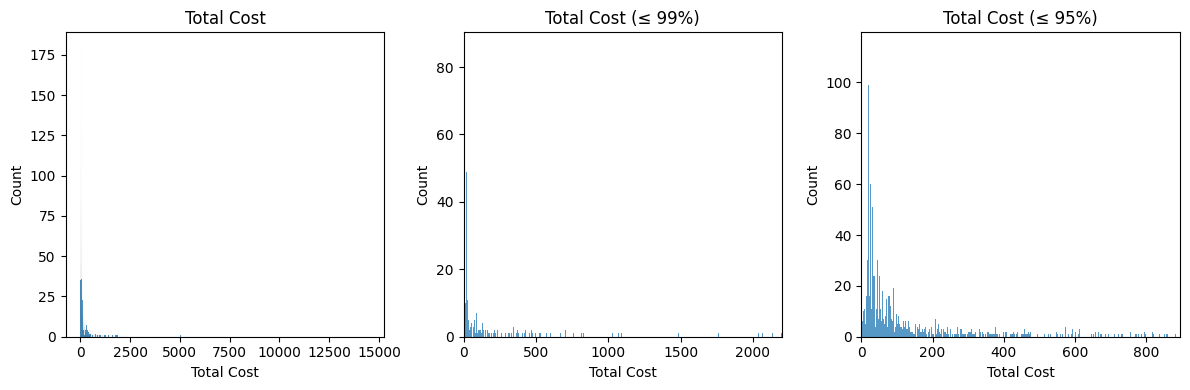

In [80]:
# Plot the distribution of average purchase price per product
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(product_revenue['Total Cost'], binwidth=3, ax=axes[0])
axes[0].set_title('Total Cost')

sns.histplot(product_revenue['Total Cost'], binwidth=0.5, ax=axes[1])
axes[1].set_xlim(0, product_revenue['Total Cost'].quantile(0.99))
axes[1].set_title('Total Cost (≤ 99%)')

sns.histplot(product_revenue['Total Cost'], binwidth=1, ax=axes[2])
axes[2].set_xlim(0, product_revenue['Total Cost'].quantile(0.95))
axes[2].set_title('Total Cost (≤ 95%)')

plt.tight_layout()
plt.show()

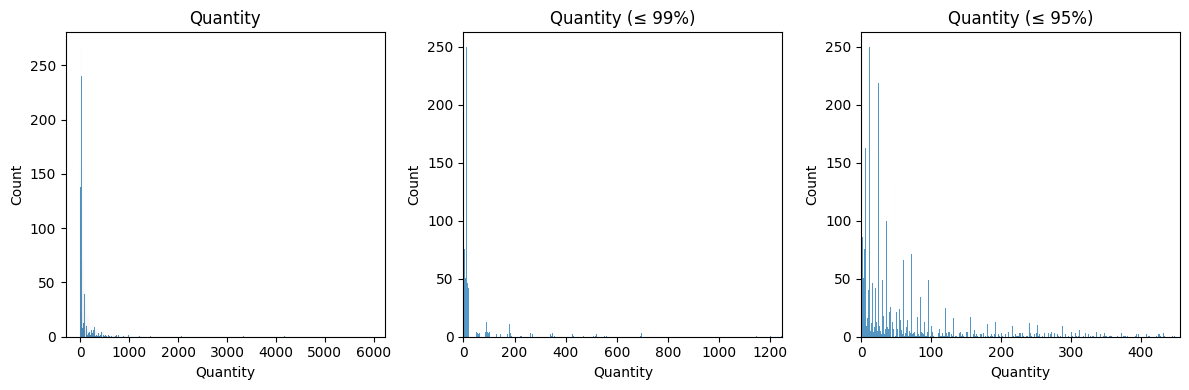

In [81]:
# Plot the distribution of quantity per product
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(product_revenue['Quantity'], binwidth=3, ax=axes[0])
axes[0].set_title('Quantity')

sns.histplot(product_revenue['Quantity'], binwidth=0.5, ax=axes[1])
axes[1].set_xlim(0, product_revenue['Quantity'].quantile(0.99))
axes[1].set_title('Quantity (≤ 99%)')

sns.histplot(product_revenue['Quantity'], binwidth=1, ax=axes[2])
axes[2].set_xlim(0, product_revenue['Quantity'].quantile(0.95))
axes[2].set_title('Quantity (≤ 95%)')

plt.tight_layout()
plt.show()

In [82]:
top_20_products_cost = product_revenue.sort_values(
    'Total Cost', ascending=False
).head(20)

top_20_products_cost

,StockCode,InvoiceDate,Description,Quantity,Price,Total Cost
1149,22423,2010-03-22 11:21:00,REGENCY CAKESTAND 3 TIER,1275,12.094481,14537.55
198,20914,2009-12-08 13:49:00,SET/5 RED SPOTTY LID GLASS BOWLS,2922,2.846774,7698.70
727,21843,2009-12-07 13:49:00,RETRO SPOT CAKE STAND,565,10.932143,6162.75
2648,85123A,2009-12-07 09:25:00,WHITE HANGING HEART T-LIGHT HOLDER,2071,2.845455,5560.65
321,21166,2010-02-07 14:27:00,COOK WITH WINE METAL SIGN,3091,1.934792,5528.08
329,21181,2009-12-01 11:41:00,PLEASE ONE PERSON METAL SIGN,2670,2.037500,5031.00
519,21523,2009-12-01 11:41:00,FANCY FONT HOME SWEET HOME DOORMAT,692,7.219149,4574.40
102,20685,2009-12-21 13:04:00,RED SPOTTY COIR DOORMAT,696,7.071111,4490.42
322,21169,2010-02-07 14:27:00,YOU'RE CONFUSING ME METAL SIGN,2855,1.560769,4179.83
520,21524,2010-01-07 12:34:00,SPOTTY HOME SWEET HOME DOORMAT,599,7.292889,3907.13


In [83]:
top_20_products_quantity = product_revenue.sort_values(
    'Quantity', ascending=False
).head(20)

top_20_products_quantity

,StockCode,InvoiceDate,Description,Quantity,Price,Total Cost
351,21212,2009-12-01 12:30:00,PACK OF 72 RETRO SPOT CAKE CASES,5928,0.529551,2776.80
2555,84991,2009-12-01 12:33:00,60 TEATIME FAIRY CAKE CASES,5556,0.527531,2587.80
805,21977,2009-12-01 12:33:00,PACK OF 60 PINK PAISLEY CAKE CASES,4188,0.531429,1960.20
2556,84992,2009-12-16 10:51:00,72 SWEETHEART FAIRY CAKE CASES,4176,0.515510,1875.60
968,22197,2009-12-15 12:00:00,"POPCORN HOLDER , SMALL",3658,0.833750,2798.34
803,21975,2009-12-21 13:04:00,PACK OF 60 DINOSAUR CAKE CASES,3336,0.519048,1507.20
321,21166,2010-02-07 14:27:00,COOK WITH WINE METAL SIGN,3091,1.934792,5528.08
198,20914,2009-12-08 13:49:00,SET/5 RED SPOTTY LID GLASS BOWLS,2922,2.846774,7698.70
61,17084R,2010-03-05 10:20:00,ASSORTED INCENSE PACK,2880,0.160000,460.80
322,21169,2010-02-07 14:27:00,YOU'RE CONFUSING ME METAL SIGN,2855,1.560769,4179.83


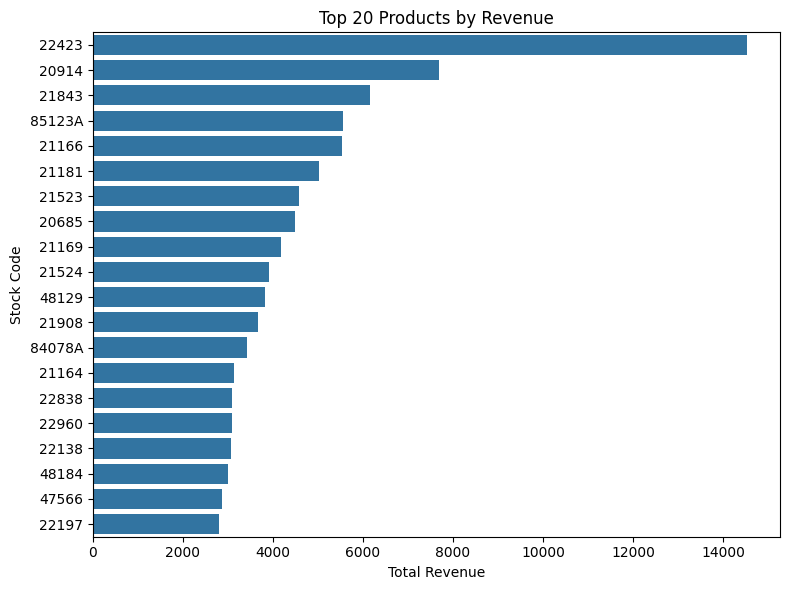

In [84]:
# Display top 20 products by cost
plt.figure(figsize=(8, 6))

sns.barplot(
    data=top_20_products_cost, x='Total Cost', y='StockCode', orient='h'
)

plt.title('Top 20 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Stock Code')
plt.tight_layout()
plt.show()

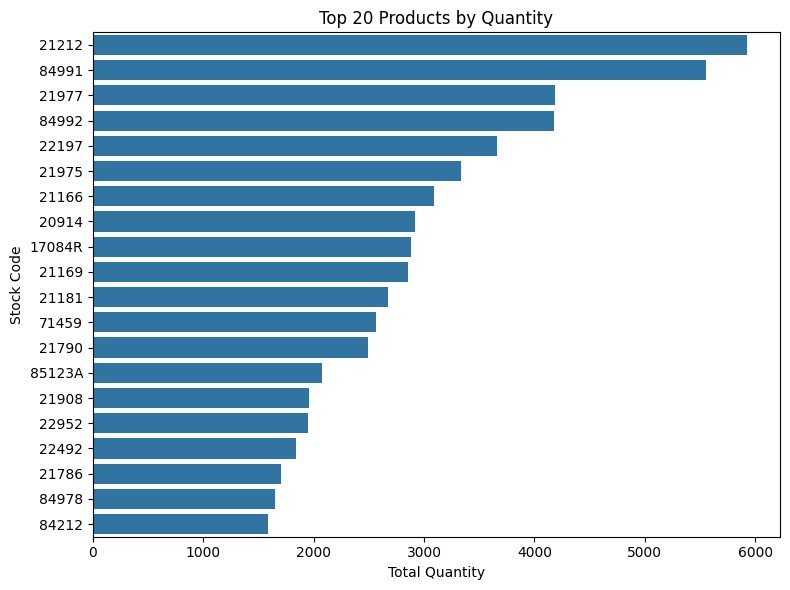

In [85]:
# Display top 20 products by quantity
plt.figure(figsize=(8, 6))

sns.barplot(
    data=top_20_products_quantity, x='Quantity', y='StockCode', orient='h'
)

plt.title('Top 20 Products by Quantity')
plt.xlabel('Total Quantity')
plt.ylabel('Stock Code')
plt.tight_layout()
plt.show()

In [86]:
top_20_monthly_cost = (
    clean_data_v2[
        clean_data_v2['StockCode'].isin(top_20_products_cost['StockCode'])
    ]
    .groupby(['StockCode', 'Year-Month'], as_index=False)['Total Cost']
    .sum()
    .sort_values(['StockCode', 'Year-Month'])
)
top_20_monthly_cost

,StockCode,Year-Month,Total Cost
0,20685,2009-12,238.00
1,20685,2010-01,906.00
2,20685,2010-02,254.00
3,20685,2010-03,283.96
4,20685,2010-05,29.96
...,...,...,...
336,85123A,2011-08,198.60
337,85123A,2011-09,159.30
338,85123A,2011-10,287.70
339,85123A,2011-11,1120.80


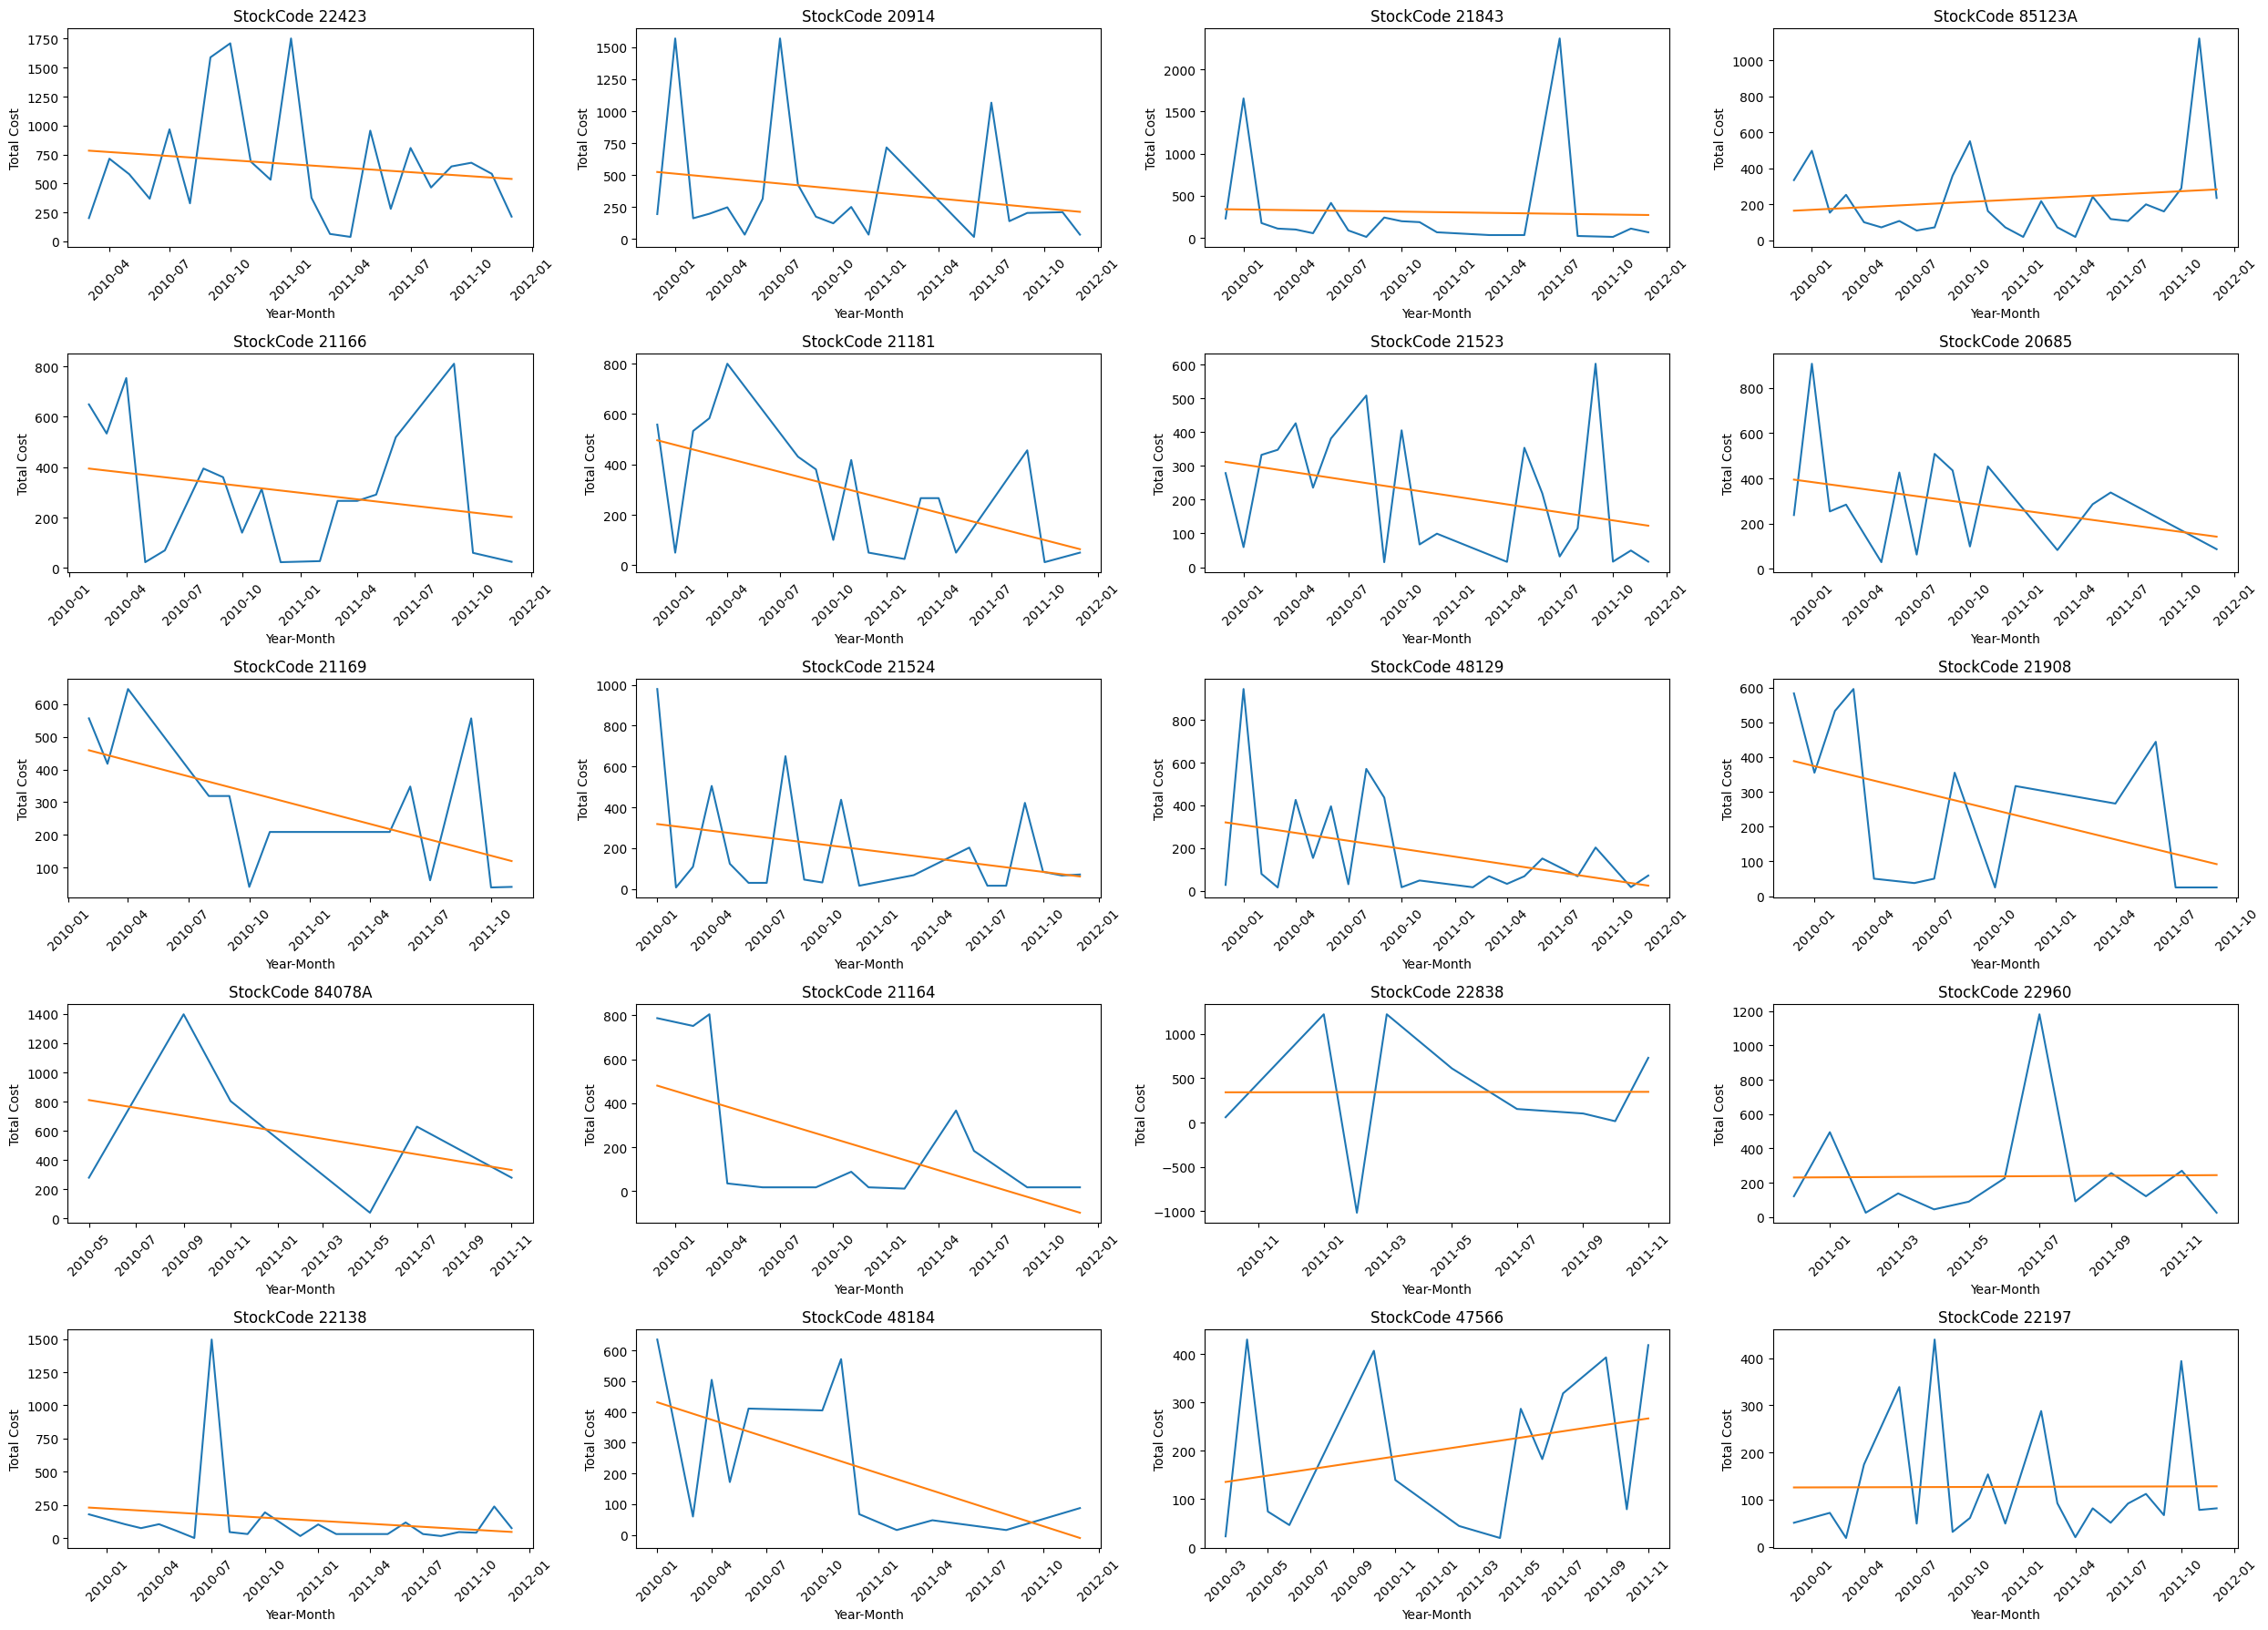

In [87]:
top_year_month_cost = top_20_monthly_cost.copy()
top_year_month_cost['Year-Month'] = top_year_month_cost[
    'Year-Month'
].dt.to_timestamp()

fig, axes = plt.subplots(5, 4, figsize=(25, 18))
axes = axes.flatten()

for ax, code in zip(axes, top_20_products_cost['StockCode']):
    subset = (
        top_year_month_cost[top_year_month_cost['StockCode'] == code]
        .sort_values('Year-Month')
        .copy()
    )

    sns.lineplot(data=subset, x='Year-Month', y='Total Cost', ax=ax)

    # Fit a simple linear trend line (least squares)
    x = subset['Year-Month'].map(lambda d: d.toordinal()).to_numpy()
    y = subset['Total Cost'].to_numpy()

    if len(x) > 1:
        m, b = np.polyfit(x, y, 1)
        subset['Trend'] = m * x + b

        sns.lineplot(data=subset, x='Year-Month', y='Trend', ax=ax)

    ax.set_title(f'StockCode {code}')
    ax.tick_params(axis='x', rotation=45)

for ax in axes[len(top_20_products_cost['StockCode']) :]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [88]:
top_20_monthly_quantity = (
    clean_data_v2[
        clean_data_v2['StockCode'].isin(top_20_products_quantity['StockCode'])
    ]
    .groupby(['StockCode', 'Year-Month'], as_index=False)['Quantity']
    .sum()
    .sort_values(['StockCode', 'Year-Month'])
)
top_20_monthly_quantity

,StockCode,Year-Month,Quantity
0,17084R,2010-03,1440
1,17084R,2010-12,1440
2,20914,2009-12,75
3,20914,2010-01,614
4,20914,2010-02,64
...,...,...,...
335,85123A,2011-08,76
336,85123A,2011-09,54
337,85123A,2011-10,110
338,85123A,2011-11,432


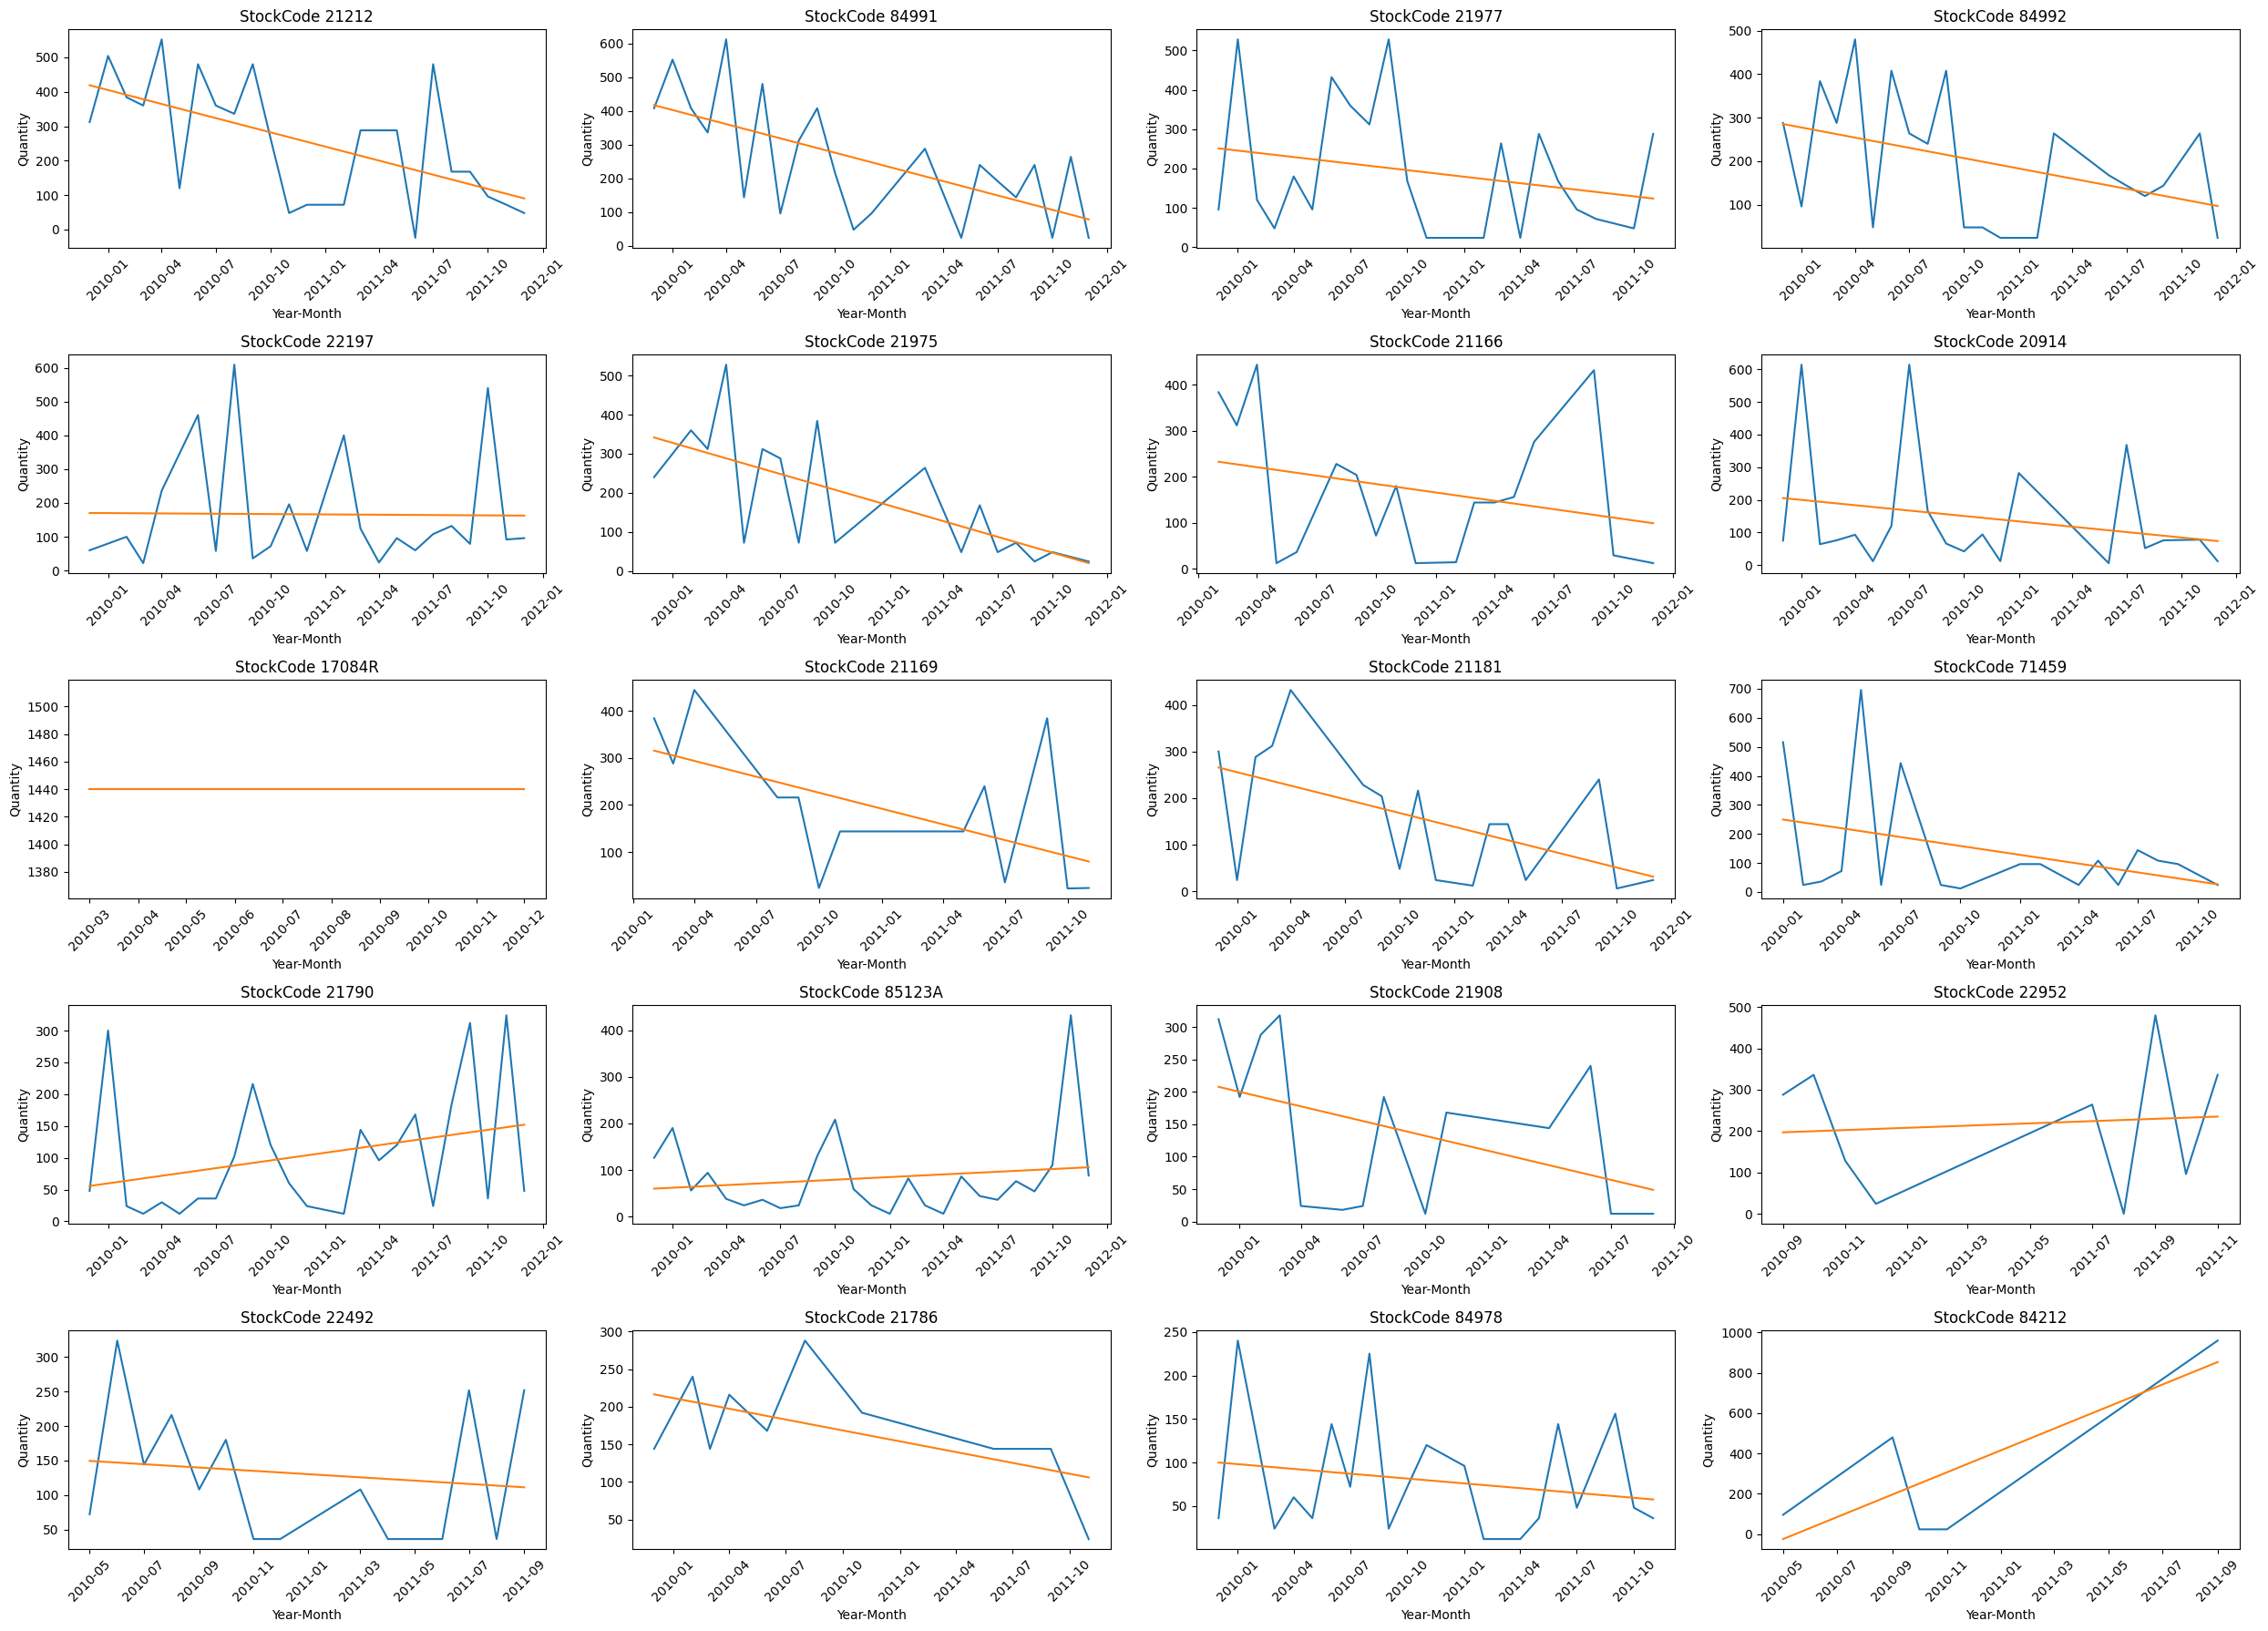

In [95]:
top_year_month_quantity = top_20_monthly_quantity.copy()
top_year_month_quantity['Year-Month'] = top_year_month_quantity[
    'Year-Month'
].dt.to_timestamp()

fig, axes = plt.subplots(5, 4, figsize=(25, 18))
axes = axes.flatten()

for ax, code in zip(axes, top_20_products_quantity['StockCode']):
    subset = (
        top_year_month_quantity[top_year_month_quantity['StockCode'] == code]
        .sort_values('Year-Month')
        .copy()
    )

    sns.lineplot(data=subset, x='Year-Month', y='Quantity', ax=ax)

    # Fit a simple linear trend line (least squares)
    x = subset['Year-Month'].map(lambda d: d.toordinal()).to_numpy()
    y = subset['Quantity'].to_numpy()

    if len(x) > 1:
        m, b = np.polyfit(x, y, 1)
        subset['Trend'] = m * x + b

        sns.lineplot(data=subset, x='Year-Month', y='Trend', ax=ax)

    ax.set_title(f'StockCode {code}')
    ax.tick_params(axis='x', rotation=45)

for ax in axes[len(top_20_products_quantity['StockCode']) :]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
df_2010_2011 = clean_data_v2[
    clean_data_v2['InvoiceDate'].dt.year.isin([2010, 2011])
].copy()

month_order = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December',
]

revenue_by_month_2010_2011 = df_2010_2011.groupby('MonthName', as_index=False)[
    'Total Cost'
].sum()

revenue_by_month_2010_2011['MonthName'] = pd.Categorical(
    revenue_by_month_2010_2011['MonthName'], categories=month_order, ordered=True
)

revenue_by_month_2010_2011 = revenue_by_month_2010_2011.sort_values('MonthName')

revenue_by_month_2010_2011

,MonthName,Total Cost
4,January,79555.55
3,February,29823.39
7,March,39837.21
0,April,30364.45
8,May,36208.28
6,June,41813.01
5,July,75597.97
1,August,38707.59
11,September,72657.18
10,October,64823.86


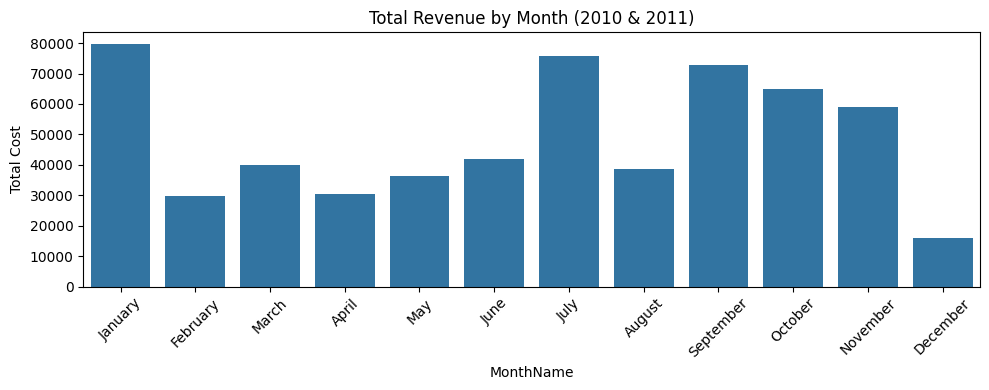

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(data=revenue_by_month_2010_2011, x='MonthName', y='Total Cost')
plt.xticks(rotation=45)
plt.title('Total Revenue by Month (2010 & 2011)')
plt.tight_layout()
plt.show()


In [100]:
quantity_by_month_2010_2011 = df_2010_2011.groupby('MonthName', as_index=False)[
    'Quantity'
].sum()

quantity_by_month_2010_2011['MonthName'] = pd.Categorical(
    quantity_by_month_2010_2011['MonthName'], categories=month_order, ordered=True
)

quantity_by_month_2010_2011 = quantity_by_month_2010_2011.sort_values('MonthName')

quantity_by_month_2010_2011

,MonthName,Quantity
4,January,39004
3,February,16899
7,March,24220
0,April,17695
8,May,17709
6,June,24565
5,July,37191
1,August,23653
11,September,40149
10,October,35561


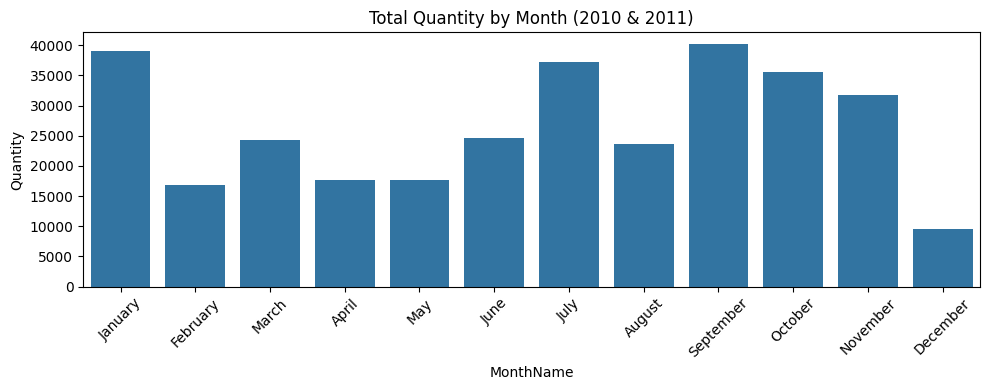

In [102]:
plt.figure(figsize=(10, 4))
sns.barplot(data=quantity_by_month_2010_2011, x='MonthName', y='Quantity')
plt.xticks(rotation=45)
plt.title('Total Quantity by Month (2010 & 2011)')
plt.tight_layout()
plt.show()
